Importing Libraries

In [49]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

Importing Dataset

In [10]:
a=pd.read_csv('C:\\Users\\Admin\\Downloads\\Datatrained Projects\\abalone.csv')
a.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
a.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [13]:
a.shape

(4177, 9)

Inference :  Total 4177 Rows and 9 Columns

In [16]:
a.isnull().values.any()

False

In [18]:
a.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

For classification problem we observe that the data will be biased i.e. the data for some instances is very less

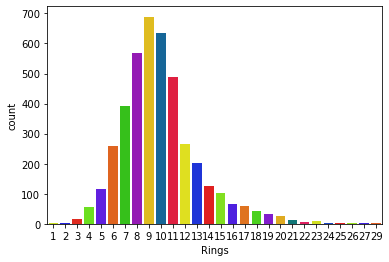

In [21]:
sns.countplot(x='Rings',data=a,palette='prism')
plt.show()

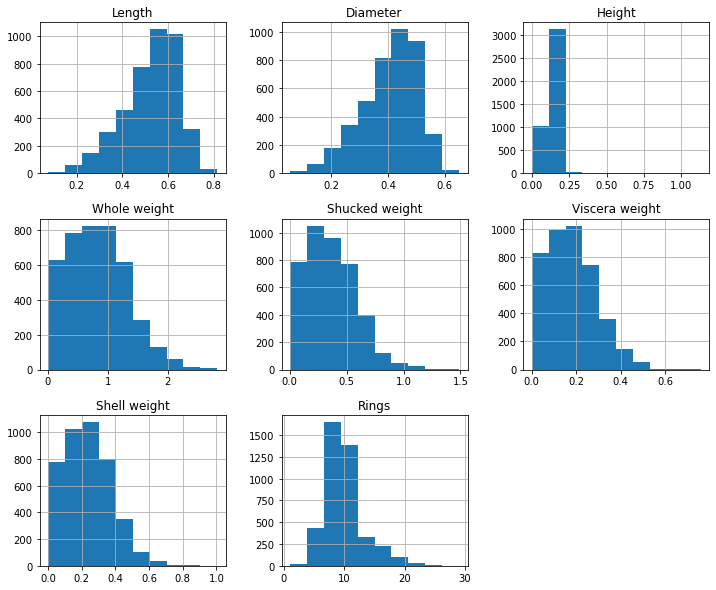

In [24]:
a.hist(bins=10,figsize=(12,10))
plt.show()

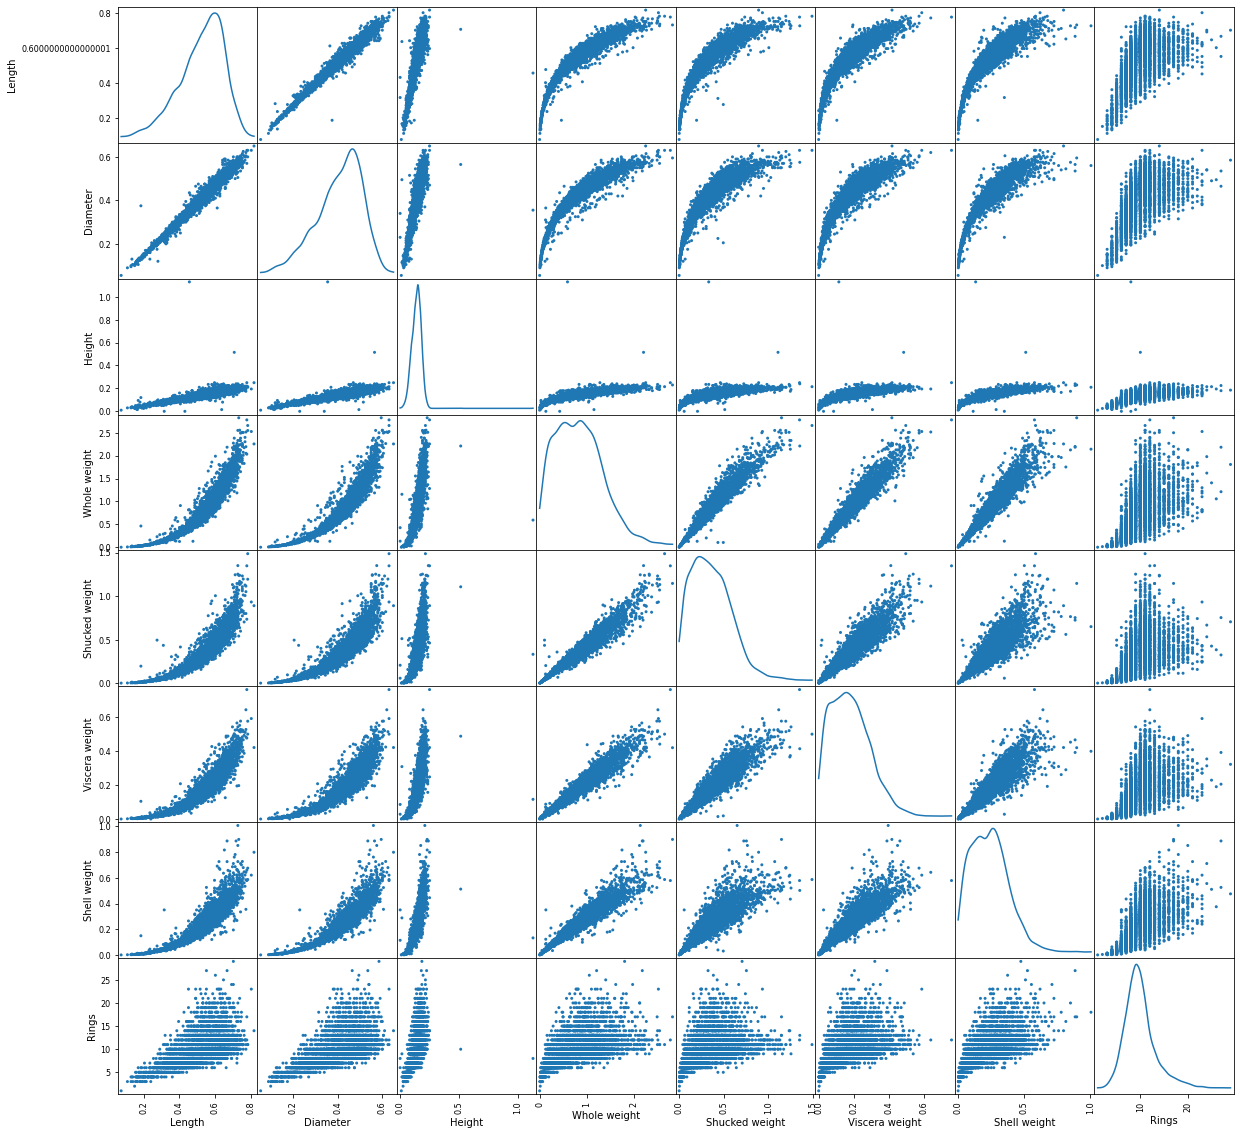

In [25]:
scatter_matrix(a,alpha=1,figsize=(20,20),diagonal='kde')
plt.show()

<AxesSubplot:>

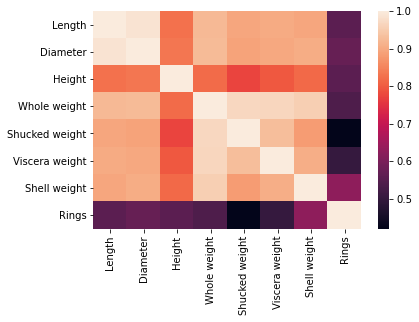

In [27]:
sns.heatmap(ab.corr())

In [26]:
a.groupby('Rings').mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,
1,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500
2,0.150000,0.100000,0.025000,0.015000,0.004500,0.004000,0.005000
3,0.176000,0.128667,0.041667,0.028400,0.011767,0.006267,0.008933
4,0.221491,0.161579,0.053947,0.059605,0.024719,0.012956,0.018000
5,0.285739,0.210696,0.069913,0.125500,0.061696,0.027330,0.036770
6,0.369363,0.278861,0.091776,0.273174,0.123158,0.058371,0.078388
7,0.422033,0.321535,0.105921,0.397386,0.182657,0.085899,0.111648
8,0.498776,0.384798,0.128556,0.640753,0.293773,0.138502,0.178609
9,0.546865,0.425218,0.142721,0.852013,0.387938,0.187803,0.236509


In [28]:
a.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Encoding the column

In [29]:
sex=a['Sex']
category = pd.get_dummies(sex)
category.head()

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [30]:
s=a.drop('Sex',axis=1).join(category)

In [31]:
d=a.drop('Rings',axis=1)

Data Normalisation

In [32]:
minmax=MinMaxScaler()
norm=pd.DataFrame(minmax.fit_transform(d.drop('Sex',axis=1)),columns=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight'])
norm.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313


In [33]:
feature=feature_norm.join(category)
feature=feature.join(a['Rings'])
feature.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0,0,1,15
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0,0,1,7
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,1,0,0,9
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0,0,1,10
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0,1,0,7


Dividing data into testing and training set

In [34]:
index = np.random.permutation(len(s))
index

array([1312, 1153, 2845, ..., 3320, 2034, 1436])

In [35]:
test_size = int( len(index) * 0.2)
test_size

835

In [37]:
test_data = index[:test_size]
train_data = index[test_size:]
train = s.iloc[train_data]
test = s.iloc[test_data]

Prediction using Decision Tree Regressor

In [38]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [39]:
regr_1.fit(train.drop('Rings',axis=1),train['Rings'])
regr_2.fit(train.drop('Rings',axis=1),train['Rings'])

DecisionTreeRegressor(max_depth=5)

In [40]:
y_1 = regr_1.predict(test.drop('Rings',axis=1))
y_2 = regr_2.predict(test.drop('Rings',axis=1))

RMSE

In [41]:
mean_square = mean_squared_error(test['Rings'],y_1)
root_mean_square = np.sqrt(mean_square)
root_mean_square

2.5668558385260503

Inference: RMSE is very less after using Decision Tree Regressor and treating it as a regression problem

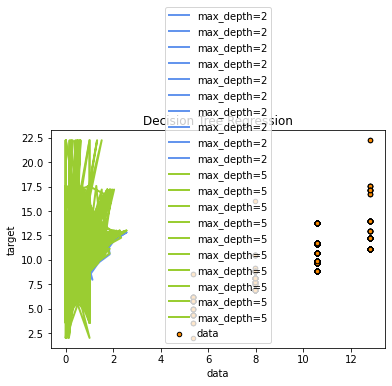

In [42]:
plt.figure()
plt.scatter(y_1,y_2,s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(test.drop('Rings',axis=1), y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(test.drop('Rings',axis=1), y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Prediction using SVM

Now let's treat it as a classification problem where we classify the Abalone on the basis of the number of rings they possess

In [43]:
svc = svm.SVC(decision_function_shape='ovo')
svc.fit(train.drop('Rings',axis=1),train['Rings'])

SVC(decision_function_shape='ovo')

In [44]:
predictions = svc.predict(test.drop('Rings',axis=1))
predictions

array([ 9,  9,  9,  9, 10,  6,  9, 10,  9,  9, 10,  9, 10, 10, 10,  9,  9,
        8,  9, 10, 10, 10,  6, 10,  9,  9,  5, 10,  9, 10,  9,  9,  9,  9,
        9, 10, 10,  6, 10,  9, 11, 10,  9,  8,  8,  9,  8,  9, 10,  6, 10,
       11, 10,  8,  9,  9, 10, 10,  9,  7, 11,  9, 10,  9,  9, 10, 10,  8,
        8, 10, 10, 11,  6,  9,  9, 10, 10,  9,  8,  9,  9,  9, 10,  8,  5,
        5, 10, 10,  7,  7, 10, 10, 11, 10,  9,  8,  7,  6,  8,  6,  7, 11,
       10,  9,  9,  9,  9,  5,  9,  8, 10,  7, 10,  8,  6, 10,  8,  9, 11,
       10,  8,  6,  5,  7,  9,  8, 10,  5,  8,  5, 10,  9, 10, 10,  9,  9,
        9, 10,  9,  9,  8,  9, 10,  9,  9,  7,  8,  9,  9, 10,  9,  8,  9,
        9,  9,  7,  9,  9,  8,  9,  8,  9,  6,  9, 10,  5,  6,  9, 10,  8,
       11, 10,  9,  9, 10,  7,  6, 10, 10, 10, 10,  7,  9,  9, 11,  8, 11,
       10,  9,  9,  8,  9,  9,  9,  8,  5, 10,  6,  7,  7,  7, 10, 10,  9,
        9,  9,  9,  8,  9,  7,  9,  9,  5, 10,  9,  9,  9,  7,  6, 10,  9,
        7,  9,  9,  6,  9

In [45]:
accuracy_score(test['Rings'],predictions)

0.25748502994011974

Inference: We get a very poor accuracy.

Linear Regression

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(train.drop(['Rings'],axis=1),train['Rings'])

LinearRegression()

In [52]:
prediction = lin_reg.predict(test.drop(['Rings'],axis=1))

RMSE

In [53]:
mean_square = mean_squared_error(test['Rings'],prediction)
root_mean_square = np.sqrt(mean_square)
root_mean_square

2.2045525513807185

Polynomial Regression

In [54]:
X = train.drop(['Rings'],axis=1)
vector = train['Rings']
predict= test.drop(['Rings'],axis=1)

In [55]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

In [56]:
clf = linear_model.LinearRegression()
clf.fit(X_, vector)
predict_poly=clf.predict(predict_)
predict_poly

array([ 9.4094696 ,  9.60154724,  9.62840271,  9.8813324 , 12.70237732,
        5.82902527,  9.12840271, 11.92076111, 11.83958435,  8.80058289,
       10.17747498,  8.93717957, 13.9025116 ,  9.82420349, 11.94932556,
        9.53422546, 11.10691833,  9.06565857,  7.34355164, 10.92808533,
       16.45701599, 21.38572693,  7.2049408 , 16.0009613 ,  9.44804382,
       10.12229919,  4.63298035, 13.18992615,  9.95347595, 10.94578552,
        9.37437439,  8.26469421,  9.44554138, 11.28770447, 12.59629822,
       18.95872498,  9.2049408 ,  7.19090271, 14.89573669,  8.99058533,
       11.78941345, 10.54270935,  9.30015564,  7.30332947,  9.49510193,
        7.91020203, 10.48155212,  9.70457458, 11.42100525,  6.33366394,
       11.38023376, 12.10411072, 11.04600525,  6.71165466, 11.55259705,
       11.23912048,  9.25718689, 11.72795105,  8.86265564,  6.63389587,
       14.09776306,  7.84007263,  9.81956482, 11.79942322,  8.39402771,
       14.78849792, 14.12986755, 11.22679138,  8.00291443,  9.54

RMSE

In [58]:
mean_square_poly = mean_squared_error(test['Rings'],predict_poly)
rmse_poly = np.sqrt(mean_square_poly)
rmse_poly

2.140209854398946

Inference: Regression would be better to classification.

In [59]:
import joblib

In [61]:
joblib.dump(clf,'abalone_project.pkl')

['abalone_project.pkl']